In [2]:
import numpy as np
import struct
import gzip
import matplotlib.pyplot as plt


In [3]:
# import torchvision
# data_transform = torchvision.transforms.Compose([
#     torchvision.transforms.ToTensor(),
#     lambda x: torch.floor(x * 255 / 128).squeeze(dim=0)
# ])

# mnist_train = torchvision.datasets.MNIST(
#     root='./temp', train=True, transform=data_transform, download=True)
# mnist_test = torchvision.datasets.MNIST(
#     root='./temp', train=False, transform=data_transform, download=True)

In [4]:
def read_images(file_path):
    with gzip.open(file_path, 'rb') as f:
        # 读取文件头信息：魔数和图片数量
        magic, num_images = struct.unpack(">II", f.read(8))
        # 读取图片的行数和列数
        num_rows, num_cols = struct.unpack(">II", f.read(8))
        print(f"Magic number: {magic}, Number of images: {num_images}, Rows: {num_rows}, Columns: {num_cols}")
        # 读取图片数据
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, num_rows, num_cols)
        return images

def read_labels(file_path):
    with gzip.open(file_path, 'rb') as f:
        # 读取文件头信息：魔数和标签数量
        magic, num_labels = struct.unpack(">II", f.read(8))
        print(f"Magic number: {magic}, Number of labels: {num_labels}")
        # 读取标签数据
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

# 设置数据集文件路径
train_images_path = 'data/train-images-idx3-ubyte.gz'
train_labels_path = 'data/train-labels-idx1-ubyte.gz'
test_images_path = 'data/t10k-images-idx3-ubyte.gz'
test_labels_path = 'data/t10k-labels-idx1-ubyte.gz'

# 读取数据集
X_train = read_images(train_images_path)
y_train = read_labels(train_labels_path)
X_test = read_images(test_images_path)
y_test = read_labels(test_labels_path)

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")


Magic number: 2051, Number of images: 60000, Rows: 28, Columns: 28
Magic number: 2049, Number of labels: 60000
Magic number: 2051, Number of images: 10000, Rows: 28, Columns: 28
Magic number: 2049, Number of labels: 10000
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [5]:
# 将像素值归一化到[0, 1]范围
X_train = X_train / 255.0
X_test = X_test / 255.0

# 将图像二值化
X_train = (X_train > 0.5).astype(int)
X_test = (X_test > 0.5).astype(int)

# 将图像展开成一维向量
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


In [6]:
class OptimizedMultinomialNaiveBayes:
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # 平滑参数
        self.classes = None
        self.class_count = None
        self.feature_count = None
        self.class_log_prior = None
        self.feature_log_prob = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_features = X.shape[1]
        self.class_count = np.zeros(n_classes)
        self.feature_count = np.zeros((n_classes, n_features))

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.class_count[idx] = X_c.shape[0]
            self.feature_count[idx, :] = np.sum(X_c, axis=0)

        self.class_log_prior = np.log(self.class_count / np.sum(self.class_count))
        self.feature_log_prob = np.log((self.feature_count + self.alpha) / (self.class_count[:, None] + self.alpha * n_features))

    def predict(self, X):
        log_likelihood = X @ self.feature_log_prob.T
        log_posterior = log_likelihood + self.class_log_prior
        return self.classes[np.argmax(log_posterior, axis=1)]


In [7]:
# 实例化并训练优化后的多项式朴素贝叶斯分类器
omnb = OptimizedMultinomialNaiveBayes(alpha=1.0)
omnb.fit(X_train, y_train)

# 在测试集上进行预测
predictions = omnb.predict(X_test)

# 计算准确率
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7026


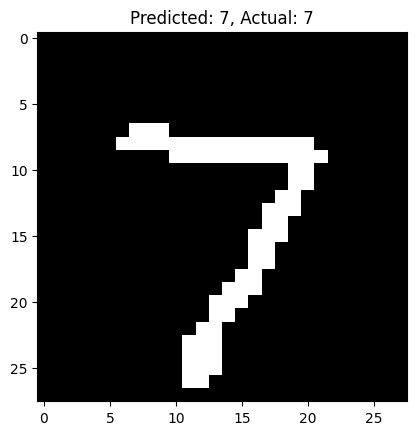

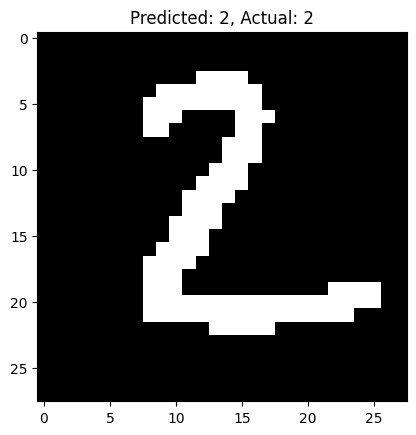

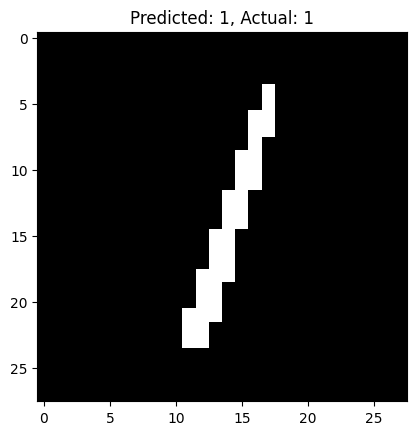

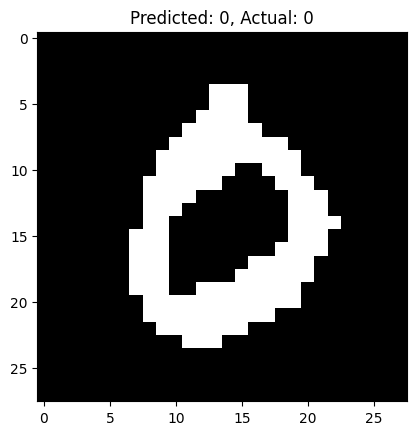

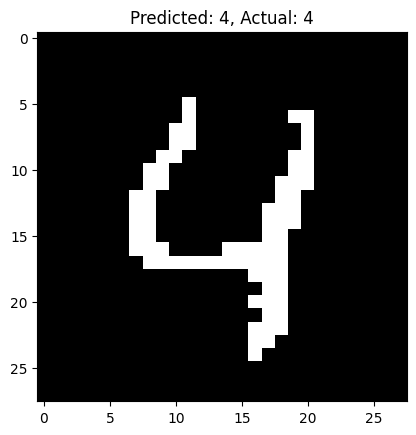

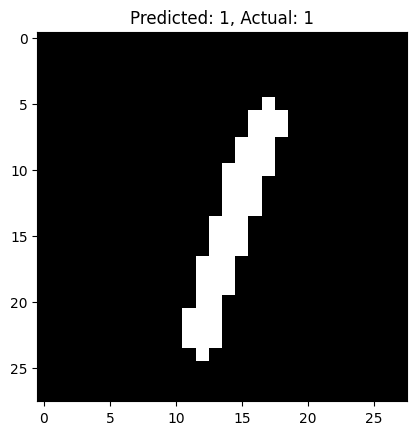

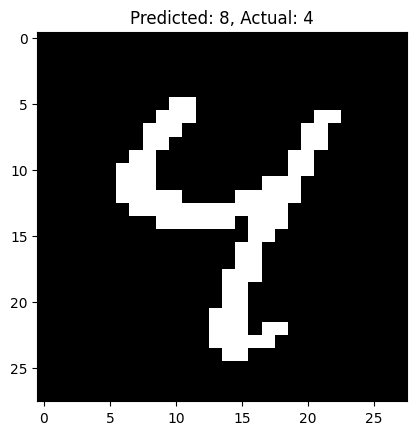

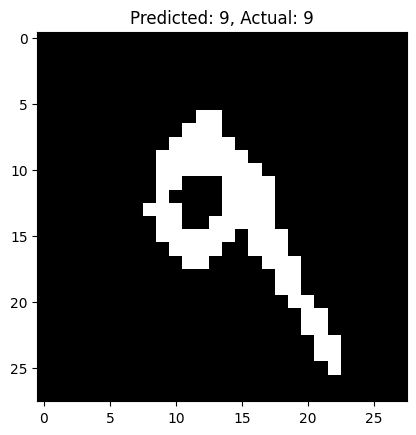

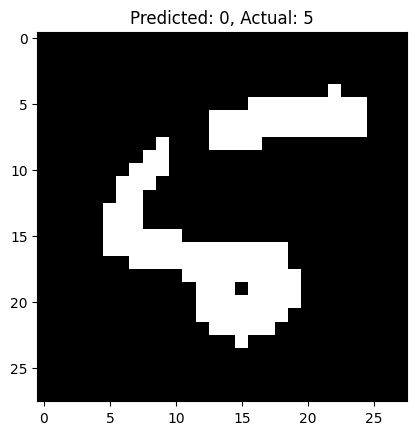

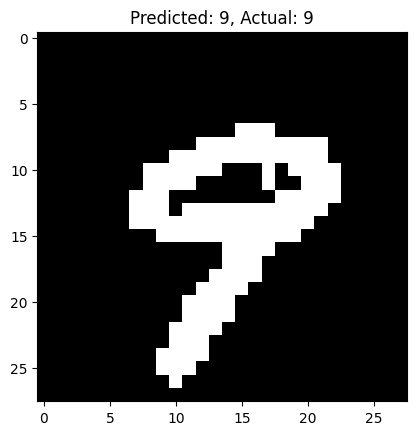

In [8]:
# 可视化前几个预测结果
for i in range(10):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predictions[i]}, Actual: {y_test[i]}')
    plt.show()


## 完整的代码（手动实现Naive Bayes）

Magic number: 2051, Number of images: 60000, Rows: 28, Columns: 28
Magic number: 2049, Number of labels: 60000
Magic number: 2051, Number of images: 10000, Rows: 28, Columns: 28
Magic number: 2049, Number of labels: 10000
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)
Accuracy: 0.7026


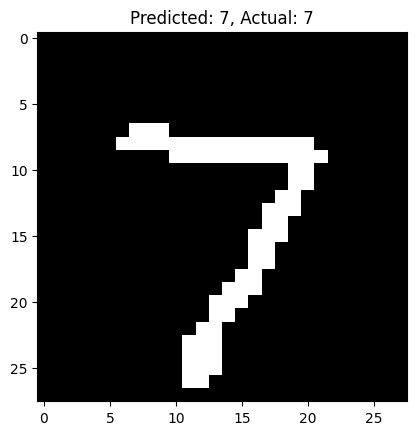

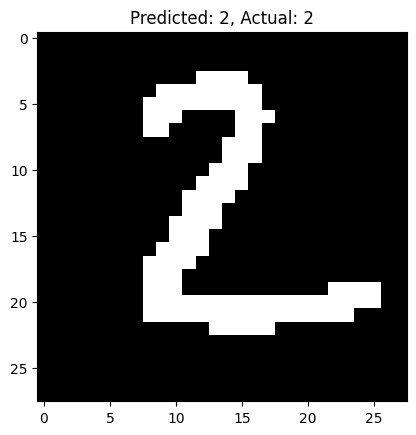

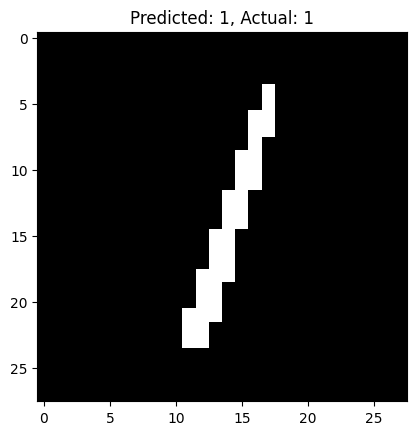

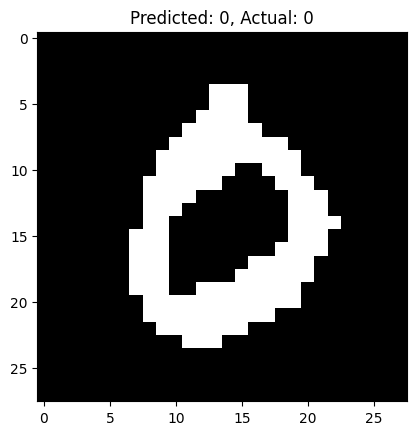

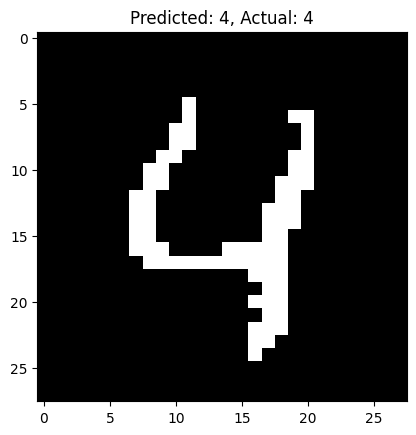

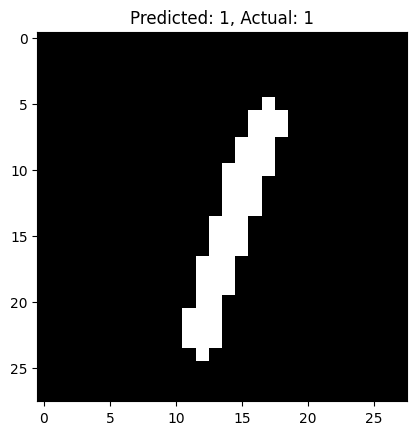

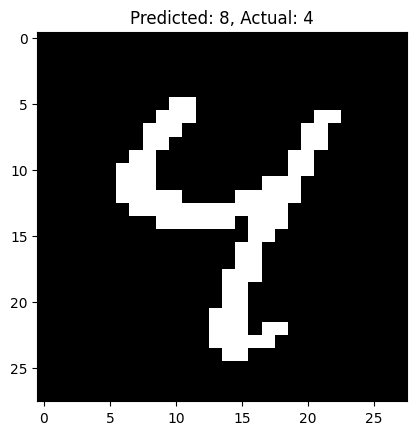

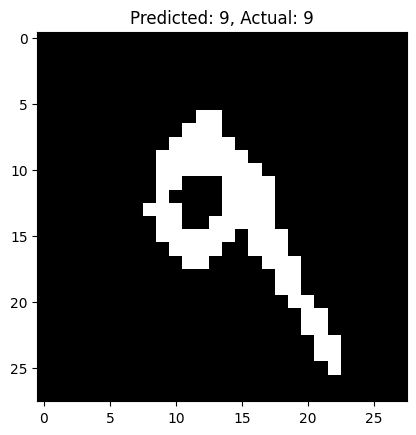

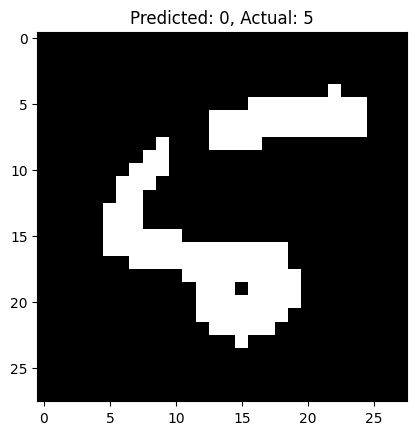

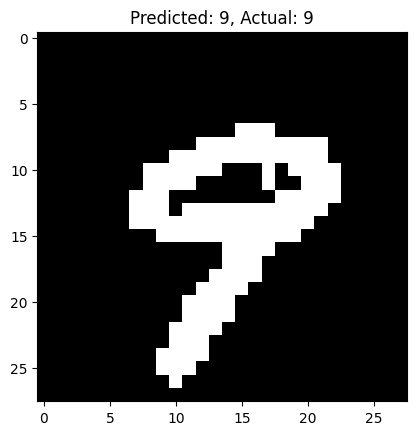

In [9]:
import numpy as np
import struct
import gzip
import matplotlib.pyplot as plt
def read_images(file_path):
    with gzip.open(file_path, 'rb') as f:
        # 读取文件头信息：魔数和图片数量
        magic, num_images = struct.unpack(">II", f.read(8))
        # 读取图片的行数和列数
        num_rows, num_cols = struct.unpack(">II", f.read(8))
        print(f"Magic number: {magic}, Number of images: {num_images}, Rows: {num_rows}, Columns: {num_cols}")
        # 读取图片数据
        images = np.frombuffer(f.read(), dtype=np.uint8).reshape(num_images, num_rows, num_cols)
        return images

def read_labels(file_path):
    with gzip.open(file_path, 'rb') as f:
        # 读取文件头信息：魔数和标签数量
        magic, num_labels = struct.unpack(">II", f.read(8))
        print(f"Magic number: {magic}, Number of labels: {num_labels}")
        # 读取标签数据
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

# 设置数据集文件路径
train_images_path = 'data/train-images-idx3-ubyte.gz'
train_labels_path = 'data/train-labels-idx1-ubyte.gz'
test_images_path = 'data/t10k-images-idx3-ubyte.gz'
test_labels_path = 'data/t10k-labels-idx1-ubyte.gz'

# 读取数据集
X_train = read_images(train_images_path)
y_train = read_labels(train_labels_path)
X_test = read_images(test_images_path)
y_test = read_labels(test_labels_path)

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")
# 将像素值归一化到[0, 1]范围
X_train = X_train / 255.0
X_test = X_test / 255.0

# 将图像二值化
X_train = (X_train > 0.5).astype(int)
X_test = (X_test > 0.5).astype(int)

# 将图像展开成一维向量
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
class OptimizedMultinomialNaiveBayes:
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # 平滑参数
        self.classes = None
        self.class_count = None
        self.feature_count = None
        self.class_log_prior = None
        self.feature_log_prob = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_features = X.shape[1]
        self.class_count = np.zeros(n_classes)
        self.feature_count = np.zeros((n_classes, n_features))

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            self.class_count[idx] = X_c.shape[0]
            self.feature_count[idx, :] = np.sum(X_c, axis=0)

        self.class_log_prior = np.log(self.class_count / np.sum(self.class_count))
        self.feature_log_prob = np.log((self.feature_count + self.alpha) / (self.class_count[:, None] + self.alpha * n_features))

    def predict(self, X):
        log_likelihood = X @ self.feature_log_prob.T
        log_posterior = log_likelihood + self.class_log_prior
        return self.classes[np.argmax(log_posterior, axis=1)]
# 实例化并训练优化后的多项式朴素贝叶斯分类器
omnb = OptimizedMultinomialNaiveBayes(alpha=1.0)
omnb.fit(X_train, y_train)

# 在测试集上进行预测
predictions = omnb.predict(X_test)

# 计算准确率
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy}')
# 可视化前几个预测结果
for i in range(10):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predictions[i]}, Actual: {y_test[i]}')
    plt.show()
